In [60]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [61]:
train_data_import = pd.read_csv("../TrainingData/neodata/fault_all_250.csv")
X=train_data_import.drop('target',axis=1)       # Training data without targets
y=train_data_import.get('target')               # Targets

Check if LDA seems to work directly from the sklearn libery. Seems pretty good.

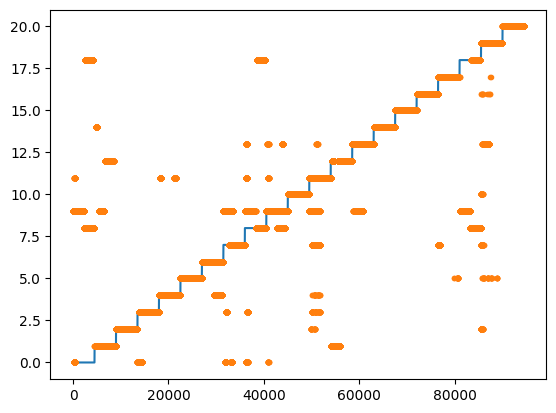

In [62]:
clf = LDA()
clf.fit(X,y)
prediction = clf.predict(X)
plt.plot(y)
plt.plot(prediction,'.')

Do dimensionality reduction to five dimensions

In [63]:
dimReducer = LDA(n_components=5)
dimReducer.fit(X,y)
transformedData=dimReducer.transform(X)
print(transformedData)

[[ 0.07845922 -0.13327767 -0.77431139 -0.06839496  0.26217402]
 [ 0.07845705 -0.13327769 -0.774312   -0.06839299  0.26217695]
 [ 0.07845488 -0.1332777  -0.77431261 -0.06839103  0.26217988]
 ...
 [-6.19430811 -8.38713884 -2.88244226 -2.31979057 -3.28934955]
 [-6.19431042 -8.38714046 -2.882441   -2.31979007 -3.2893468 ]
 [-6.19431271 -8.38714207 -2.88243973 -2.31978956 -3.28934405]]


Do classsification in the five dimensions

0.7488571428571429


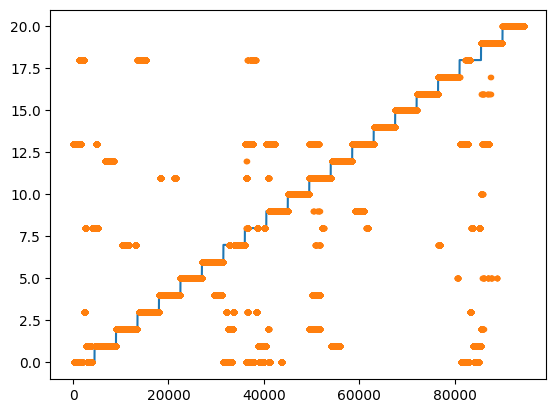

In [64]:
clf.fit(transformedData,y)
prediction5D = clf.predict(transformedData)
plt.plot(y)
plt.plot(prediction5D,'.')

correctCount =0
# Calculate accuracy
for n in range(len(prediction5D)):
    if(y[n]==prediction5D[n]):
        correctCount = correctCount + 1     #Clumsy syntax --> Avoid mistakes

print(correctCount/len(prediction5D))